## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [1]:
# Inicializção das bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# Lê e carrega o arquivo para a memória
df = pd.read_csv("aptos.csv")

# Conhecendo os atributos básicos através das 15 primeiras linhas.
df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


In [3]:
#Tentativa falha em tentar usar a coluna categórica bairro, 
#transformando-a em numérica para o algorítimo de regressão.
'''dummy_features = pd.get_dummies(df['bairro'])
pd.concat([df, dummy_features], axis = 1)'''

"dummy_features = pd.get_dummies(df['bairro'])\npd.concat([df, dummy_features], axis = 1)"

In [4]:
df.bairro.unique()

array(['Vila Lusitania', 'Ferrazopolis', 'Centro', 'Taboao', 'Demarchi',
       'Baeta Neves', 'Rudge Ramos', 'Pauliceia', 'Planalto', 'Assuncao',
       'Independencia', 'Jardim do Mar', 'Nova Petropolis',
       'Jordanopolis', 'Santa Teresinha', 'Iraja', 'Piraporinha'],
      dtype=object)

In [5]:
df.head()

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: Tamanho do apartamento em metros quadrados.
-   Valor: Preço do imóvel, valor em mil reais (ex: 560, quinhentos e sessenta mil reais).
-   Quartos: Quantidade de quartos que o apartamento possui.
-   Vagas: Quantidade de vagas para carros.
-   Reformado: Informa se o apartamento já foi reformado ou não (0 - não foi reformado, 1 - foi reformado).
-   Bairro: Bairro em que o apartamento está localizado.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  Quanto maior o número de quartos e vagas, maior o valor do apartamento.
2.  Na média, apartamentos com maior área tendem a ser mais caros.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

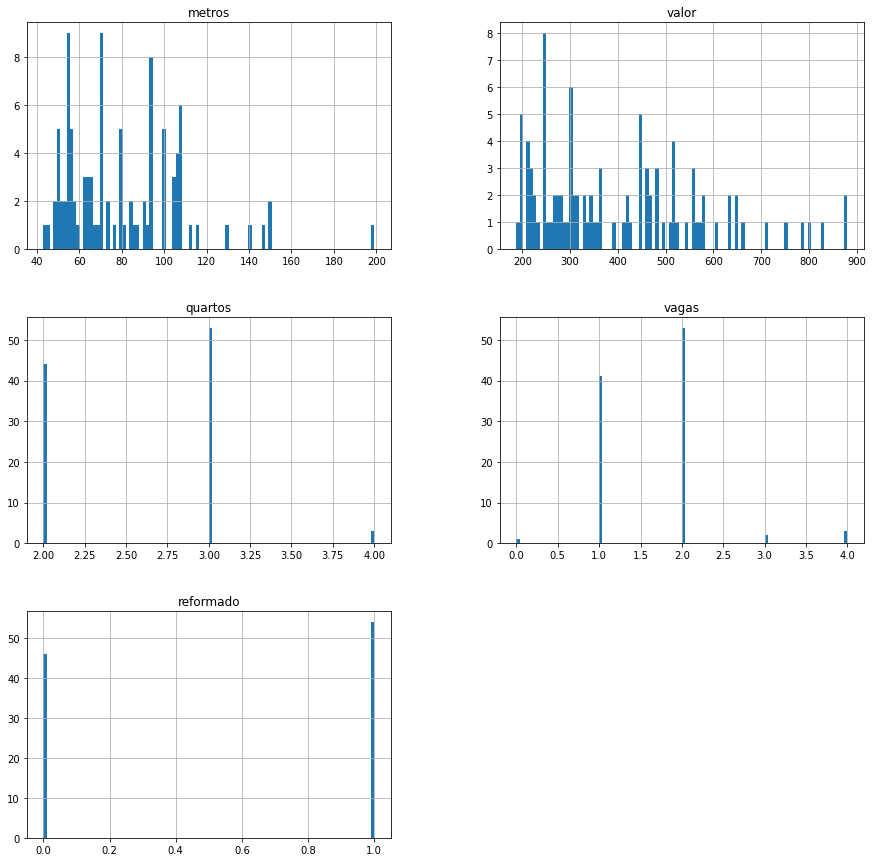

In [6]:
df.hist(bins=100, figsize=(15, 15))
plt.show()

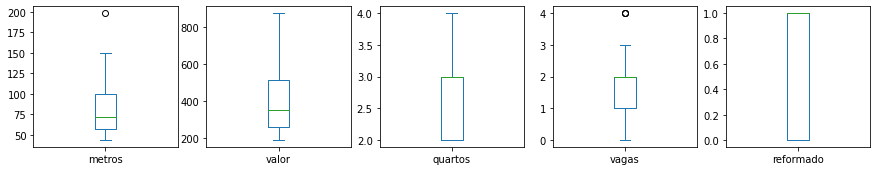

In [7]:
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

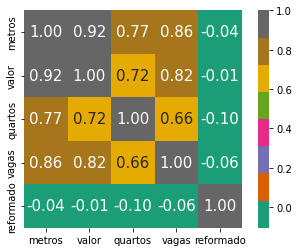

In [8]:
cols = ['metros', 'valor', 'quartos','vagas','reformado']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

<AxesSubplot:xlabel='metros', ylabel='valor'>

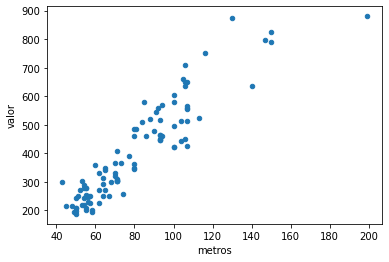

In [9]:
df.plot.scatter('metros', 'valor')

valores:
 - 0.9 a 1 indica uma correlação muito forte. **Metros x Valor (0.92)**

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

**Resposta:**

Foram localizados outliers através do método de bloxplot, que mostra os outliers através da representação de uma "bolinha" no gráfico, porém os dados foram mantidos.


## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Algoritimo de Regressão Linear.
2. Algoritimo de Regressão Polinomial.

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. Basicamente, o que o algoritmo de regressão linear faz é ajustar várias retas nos pontos de dados e retornar a reta que resulta no menor erro. Tudo isso em uma equação matemática.
2. A regressão polinomial é uma forma de regressão linear e  vem para resolver um "problema" intrínseco na regresão linear, que é justamente a linearidade e que nem sempre é tão precisa, porém teoricamente podemos aproximar qualquer função com um polinômio, isso é a regressão polinomial.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [10]:
# Vamos treinar nosso modelo com 4 atributos.
# para predizer o valor de saida
X = df[['metros', 'quartos', 'vagas', 'reformado']]  #faltou bairro

Y = df['valor']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

Formato das tabelas de dados (100, 4) e saidas (100,)
(80, 4)
(20, 4)
(80,)
(20,)


Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [22]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)

# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
y_treino_predito = lin_model.predict(X_treino)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [530.21637125 249.38872487 334.6259739  423.62691406 483.25127953
 423.0050646  450.81100995 558.0223166  198.41115839 846.0042794
 207.67980684 783.23807227 342.40213979 263.29169755 530.21637125
 230.85142797 669.24609801 437.52988674 342.40213979 846.0042794 ]


In [23]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto do Treino (MAE): %.2f" % mean_absolute_error(Y_treino, y_treino_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 123409 
Erro Quadrático Médio (MSE): 6170.43
Erro Médio Absoluto (MAE): 55.40
Erro Médio Absoluto do Treino (MAE): 48.72
Raiz do Erro Quadrático Médio (RMSE): 78.55 
R2-score: 0.84


Text(0, 0.5, 'Valor Predito')

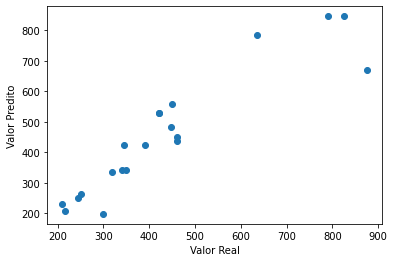

In [13]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

### Algoritmo 2

Soma dos Erros ao Quadrado (SSE): 254143 
Erro Quadrático Médio (MSE): 3176.79
Erro Médio Absoluto (MAE): 45.86
Erro Médio Absoluto do Treino (MAE): 45.86
Raiz do Erro Quadrático Médio (RMSE): 56.36 
R2-score: 0.88


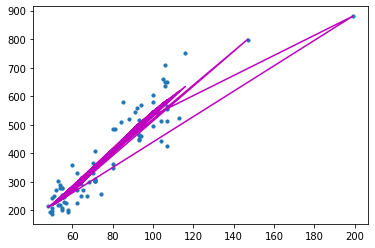

In [30]:
# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#----É aqui que o seu código muda

# Chama a função definindo o grau do polinomio e aplica o modelo
x = X_treino.iloc[:, 0:1].values 
y = Y_treino


polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print("Erro Médio Absoluto do Treino (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)

plt.plot(x, y_poly_pred, color='m')
plt.show()

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 48.72 | 45.86 |
| teste  | 55.40 | 45.86 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O algoritimo de regressão polinomial se adequou melhor, logo teve melhor resultado.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [29]:
lin_model.predict([[65, 2, 2, 1]])



/home/carlos/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([342.40213979])

**Resposta:** o modelo previu que um apartamento com essas características custaria algo em torno de 342 mil reais.

## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: O modelo desenvolvido poderia performar melhor, os algorítimos escolhidos talvez não tenham sido os mais adequados para o problema, porém com mais desenvolvimento e algum tratamento nos dados poderia ter se comportado melhor.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Testaria mais modelos para saber qual perfomaria melhor do que os utilizados.




